# Data Dictionary

| Column Name       | Description                                                       |
|-------------------|-------------------------------------------------------------------|
| **car_ID**        | Unique id of each observation                                     |
| **symboling**     | Assigned insurance risk rating (+3 = risky, -3 = safe)            |
| **CarName**       | Name of car company                                               |
| **fueltype**      | Car fuel type (gas or diesel)                                     |
| **aspiration**    | Aspiration used in a car                                          |
| **doornumber**    | Number of doors in a car                                          |
| **carbody**       | Body of car                                                       |
| **drivewheel**    | Type of drive wheel                                               |
| **enginelocation**| Location of car engine                                            |
| **wheelbase**     | Wheelbase of car                                                  |
| **carlength**     | Length of car                                                     |
| **carwidth**      | Width of car                                                      |
| **carheight**     | Height of car                                                     |
| **curbweight**    | Weight of car without occupants or baggage                        |
| **enginetype**    | Type of engine                                                    |
| **cylindernumber**| Number of cylinders in the car                                    |
| **enginesize**    | Size of car engine                                                |
| **fuelsystem**    | Fuel system of car                                                |
| **boreratio**     | Bore ratio of car                                                 |
| **stroke**        | Stroke or volume inside the engine                                |
| **compressionratio** | Compression ratio of car                                       |
| **horsepower**    | Horsepower of car                                                 |
| **peakrpm**       | Car peak RPM                                                      |
| **citympg**       | Mileage in city                                                   |
| **highwaympg**    | Mileage on highway                                                |
| **price**         | Price of car                                                      |


# Importing Denpendencies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import AdaBoostRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# Data Collection

In [2]:
df=pd.read_csv('CarPrice.csv')

# Data Exploration

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [6]:
df.shape

(205, 26)

In [7]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

doornumber and cylindernumber are categorical but they must be changed to numerical 

In [9]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [10]:
# Replace words to numbers
df['doornumber'] = df['doornumber'].replace({"four": 4, "two": 2})

In [11]:
df['doornumber'].unique()

array([2, 4], dtype=int64)

In [12]:
df['cylindernumber'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [13]:
df['cylindernumber'] = df['cylindernumber'].replace({
    "four": 4, "two": 2, "six": 6, "five": 5, "three": 3, "eight": 8, "twelve": 12}).astype(int)

In [14]:
df['cylindernumber'].unique()

array([ 4,  6,  5,  3, 12,  2,  8])

In [15]:
# Checking the numerical columns in the dataset
df.select_dtypes(include="number").columns

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'],
      dtype='object')

In [16]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [17]:
df.duplicated().sum()

0

# Data Cleaning

In [18]:
#Create the column as 'CompanyName' using 'CarName' Column
df['CompanyName'] = df['CarName'].apply(lambda x: x.split()[0])

# Listing down the unique 'CompanyName'
unique_company_names = df['CompanyName'].unique()
print('the different company names are:\n',unique_company_names)

the different company names are:
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [19]:
df['CompanyName'] = df['CompanyName'].replace({
    "maxda": "mazda",
    "Nissan": "nissan",
    "porcshce": "porsche",
    "toyouta": "toyota",
    "vokswagen":"volkswagen",
    "vw":"volkswagen"
})


In [20]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [21]:
df.select_dtypes(include="number").columns

Index(['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'],
      dtype='object')

In [22]:
df.select_dtypes(include="object").columns

Index(['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'fuelsystem', 'CompanyName'],
      dtype='object')

# Data Visualisation

In [23]:
numeric_df=df.select_dtypes(include="number")

In [24]:
numeric_df.corr().loc["price"]

car_ID             -0.109093
symboling          -0.079978
doornumber          0.031835
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
cylindernumber      0.718305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

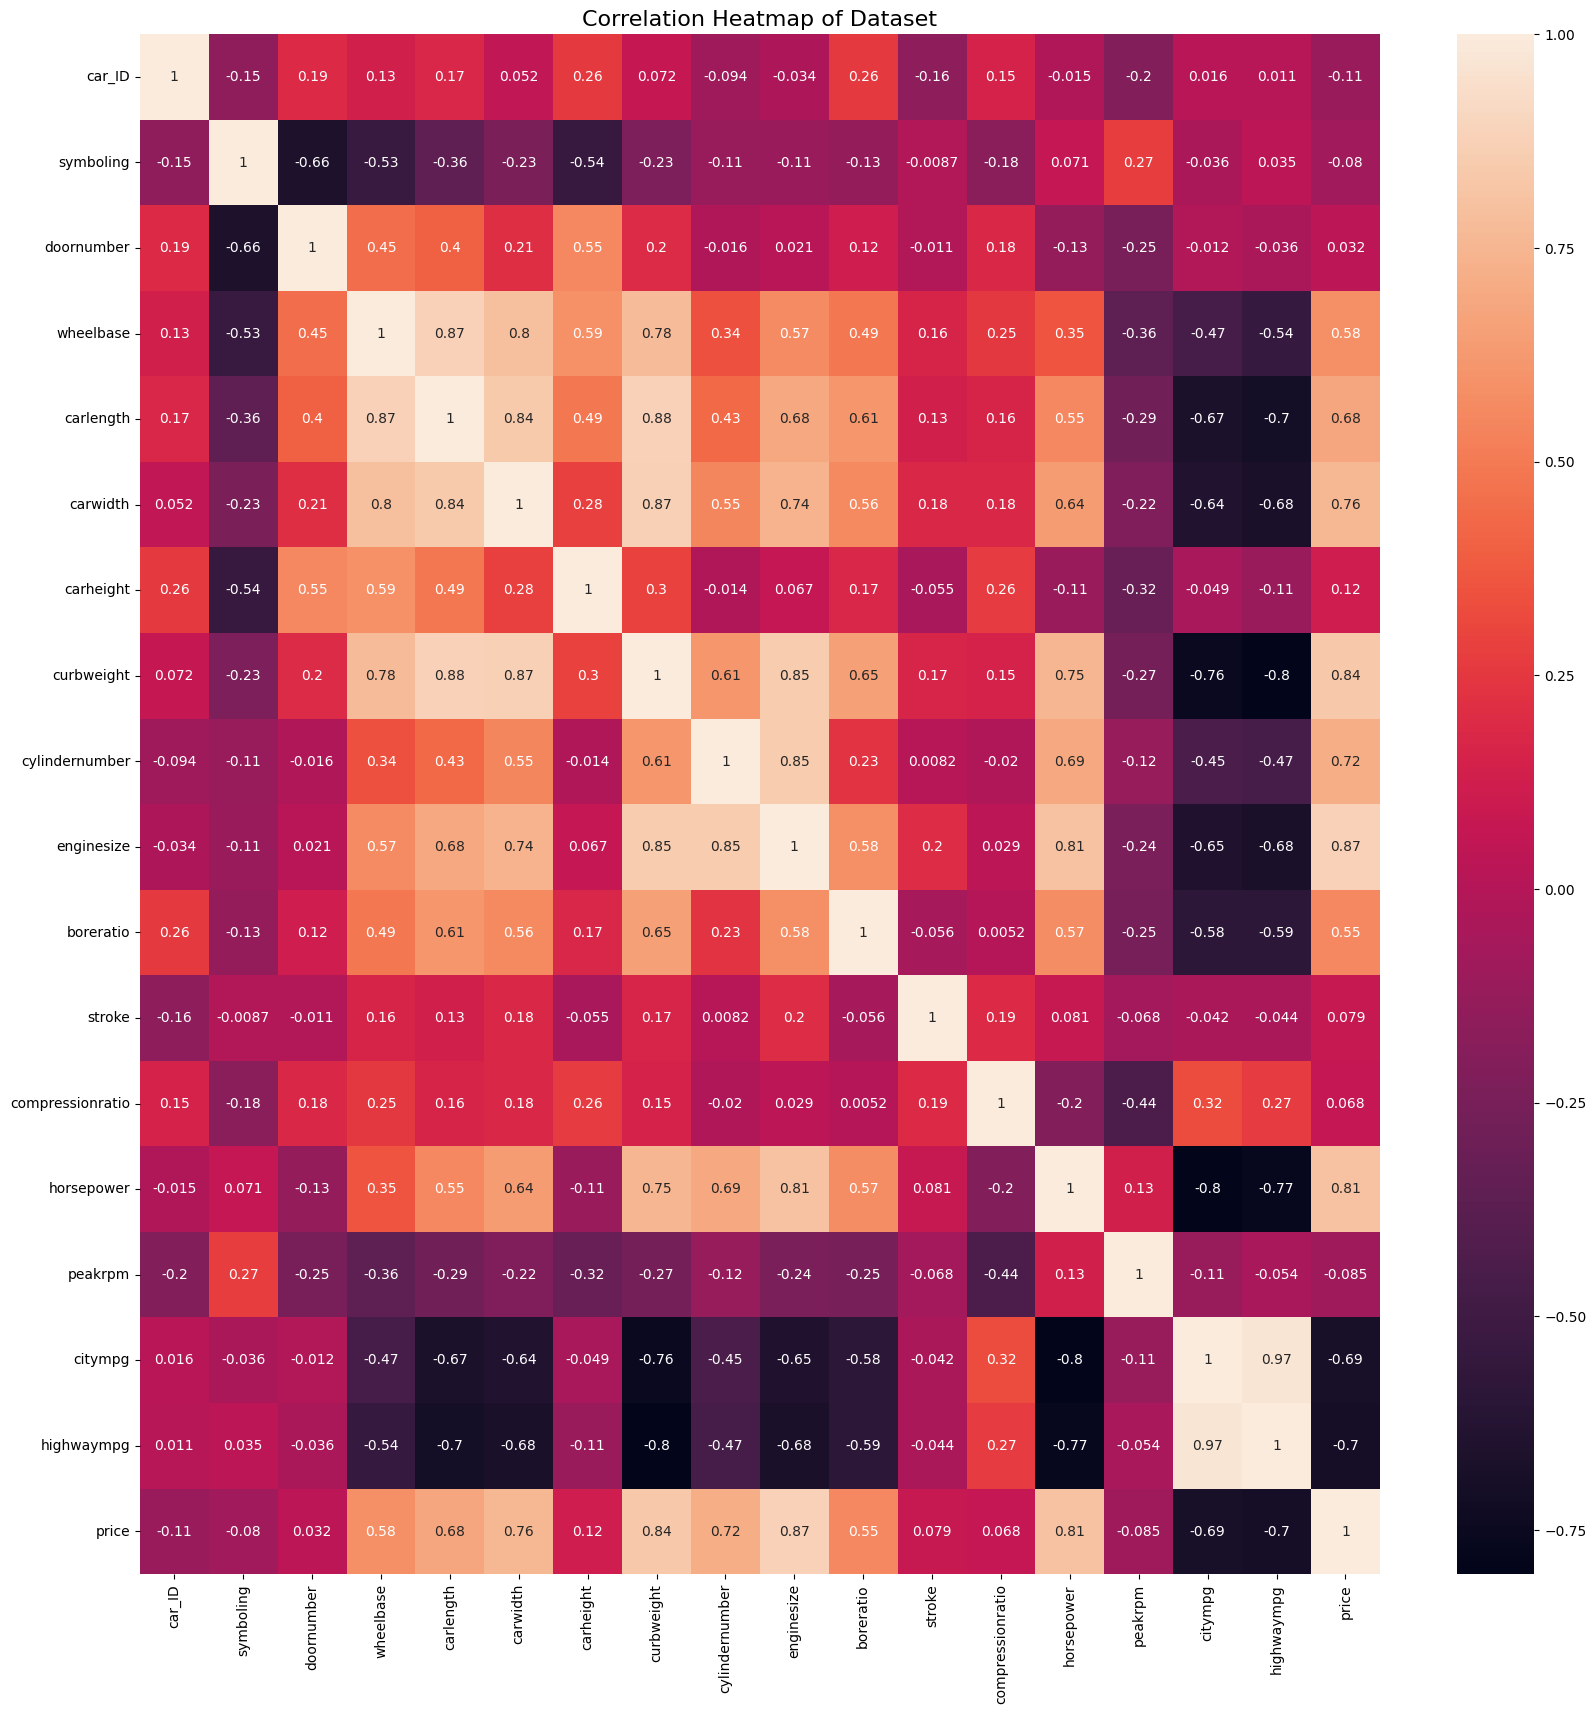

In [25]:
# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Create the heatmap
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(numeric_df.corr(), annot=True, ax=ax)
ax.set_title('Correlation Heatmap of Dataset', fontsize=16)
plt.show()

# Insights from Correlation Analysis

## Strong Positive Correlations with Price
- **Curbweight, Enginesize, Horsepower, Bore Ratio, Cylindernumber, Carwidth, Carlength, Wheelbase**  
These attributes show strong positive correlations with car price. As these features increase, the price tends to rise. Heavier cars with larger engines and more horsepower are generally more expensive.

## Strong Negative Correlations with Price
- **Highwaympg, Citympg**  
These attributes exhibit strong negative correlations with price. Higher fuel efficiency (higher miles per gallon) is often associated with more affordable or economical cars.

## Weak Correlations with Price
- **CarID, Symboling, Doornumber, Stroke, Height, Compressionratio, Peakrpm**  
These features have weak correlations with price (correlation coefficients near zero), indicating they have less impact on car pricing.

## Multicollinearity
- **Carlength, Carwidth, Wheelbase, Curbweight, Enginesize**  
These variables are highly positively correlated with each other. Larger cars tend to be heavier and have bigger engines, indicating multicollinearity among these features.

- **Highwaympg, Citympg**  
These variables are highly positevely correlated with each other. As fuel efficiency increases, both city and highway mileage tend to increase, which may also contribute to multicollinearity.

- **Horsepower, Cylindernumber, Enginesize**  
These variables are moderately positively correlated. Cars with more powerful engines often have more cylinders and larger engine sizes.


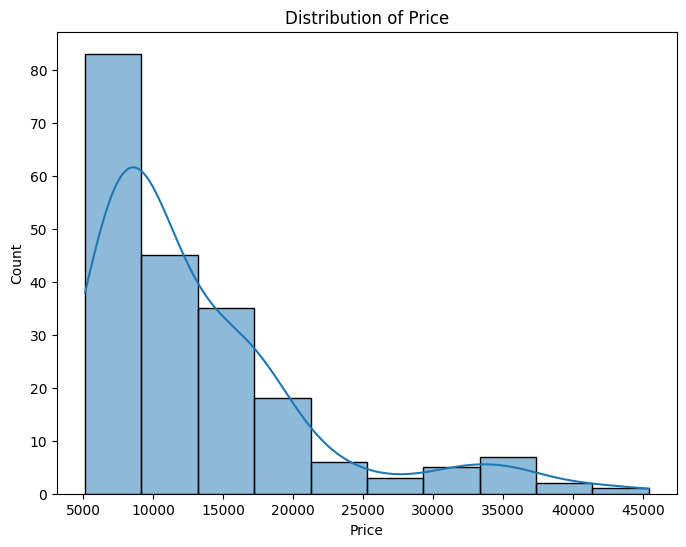

In [26]:
# Distribution plot for "price"
# -------------------------------
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, bins=10)
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

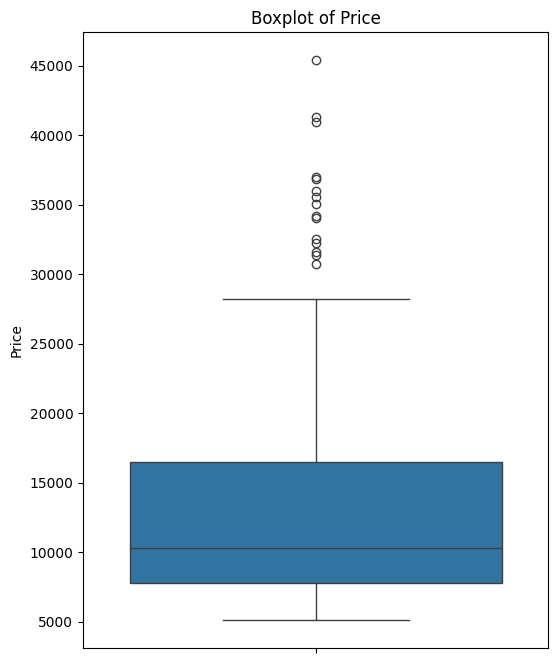

In [27]:
# Boxplot for "price" (outliers)
# -------------------------------
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['price'])
plt.title("Boxplot of Price")
plt.ylabel("Price")
plt.show()

### The distribution of price is positively skewed.
### There are few outliers observed on the upper side of the central distribution.
### -> normalisation is needed

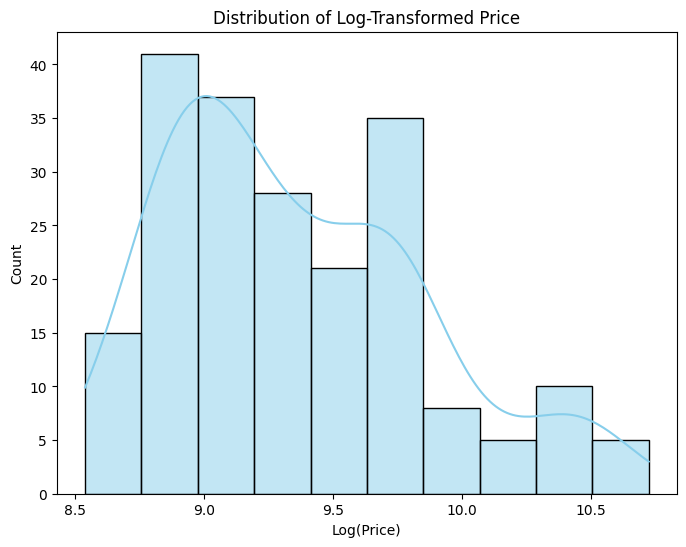

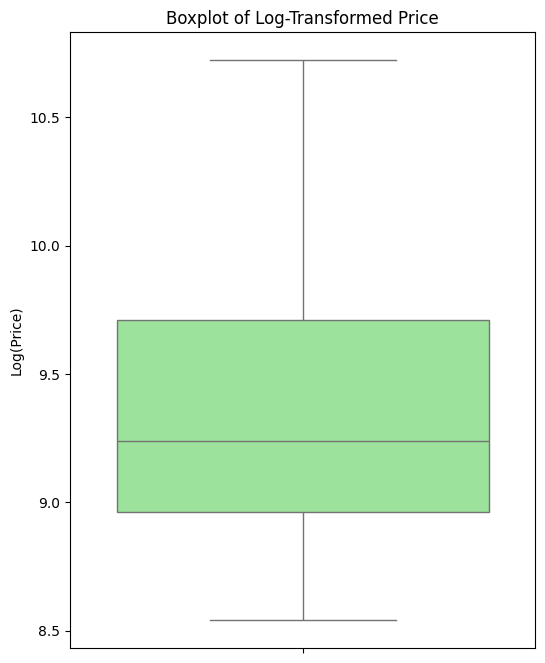

In [28]:
# Apply log transformation to price column
df['price'] = np.log(df['price'])

# Distribution plot
plt.figure(figsize=(8, 6))
sns.histplot(df['price'], kde=True, bins=10, color='skyblue')
plt.title("Distribution of Log-Transformed Price")
plt.xlabel("Log(Price)")
plt.ylabel("Count")
plt.show()

# Boxplot
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['price'], color='lightgreen')
plt.title("Boxplot of Log-Transformed Price")
plt.ylabel("Log(Price)")
plt.show()


# SKEWNESS

In [29]:
numeric_df.skew()

car_ID              0.000000
symboling           0.211072
doornumber         -0.247552
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
cylindernumber      2.817459
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

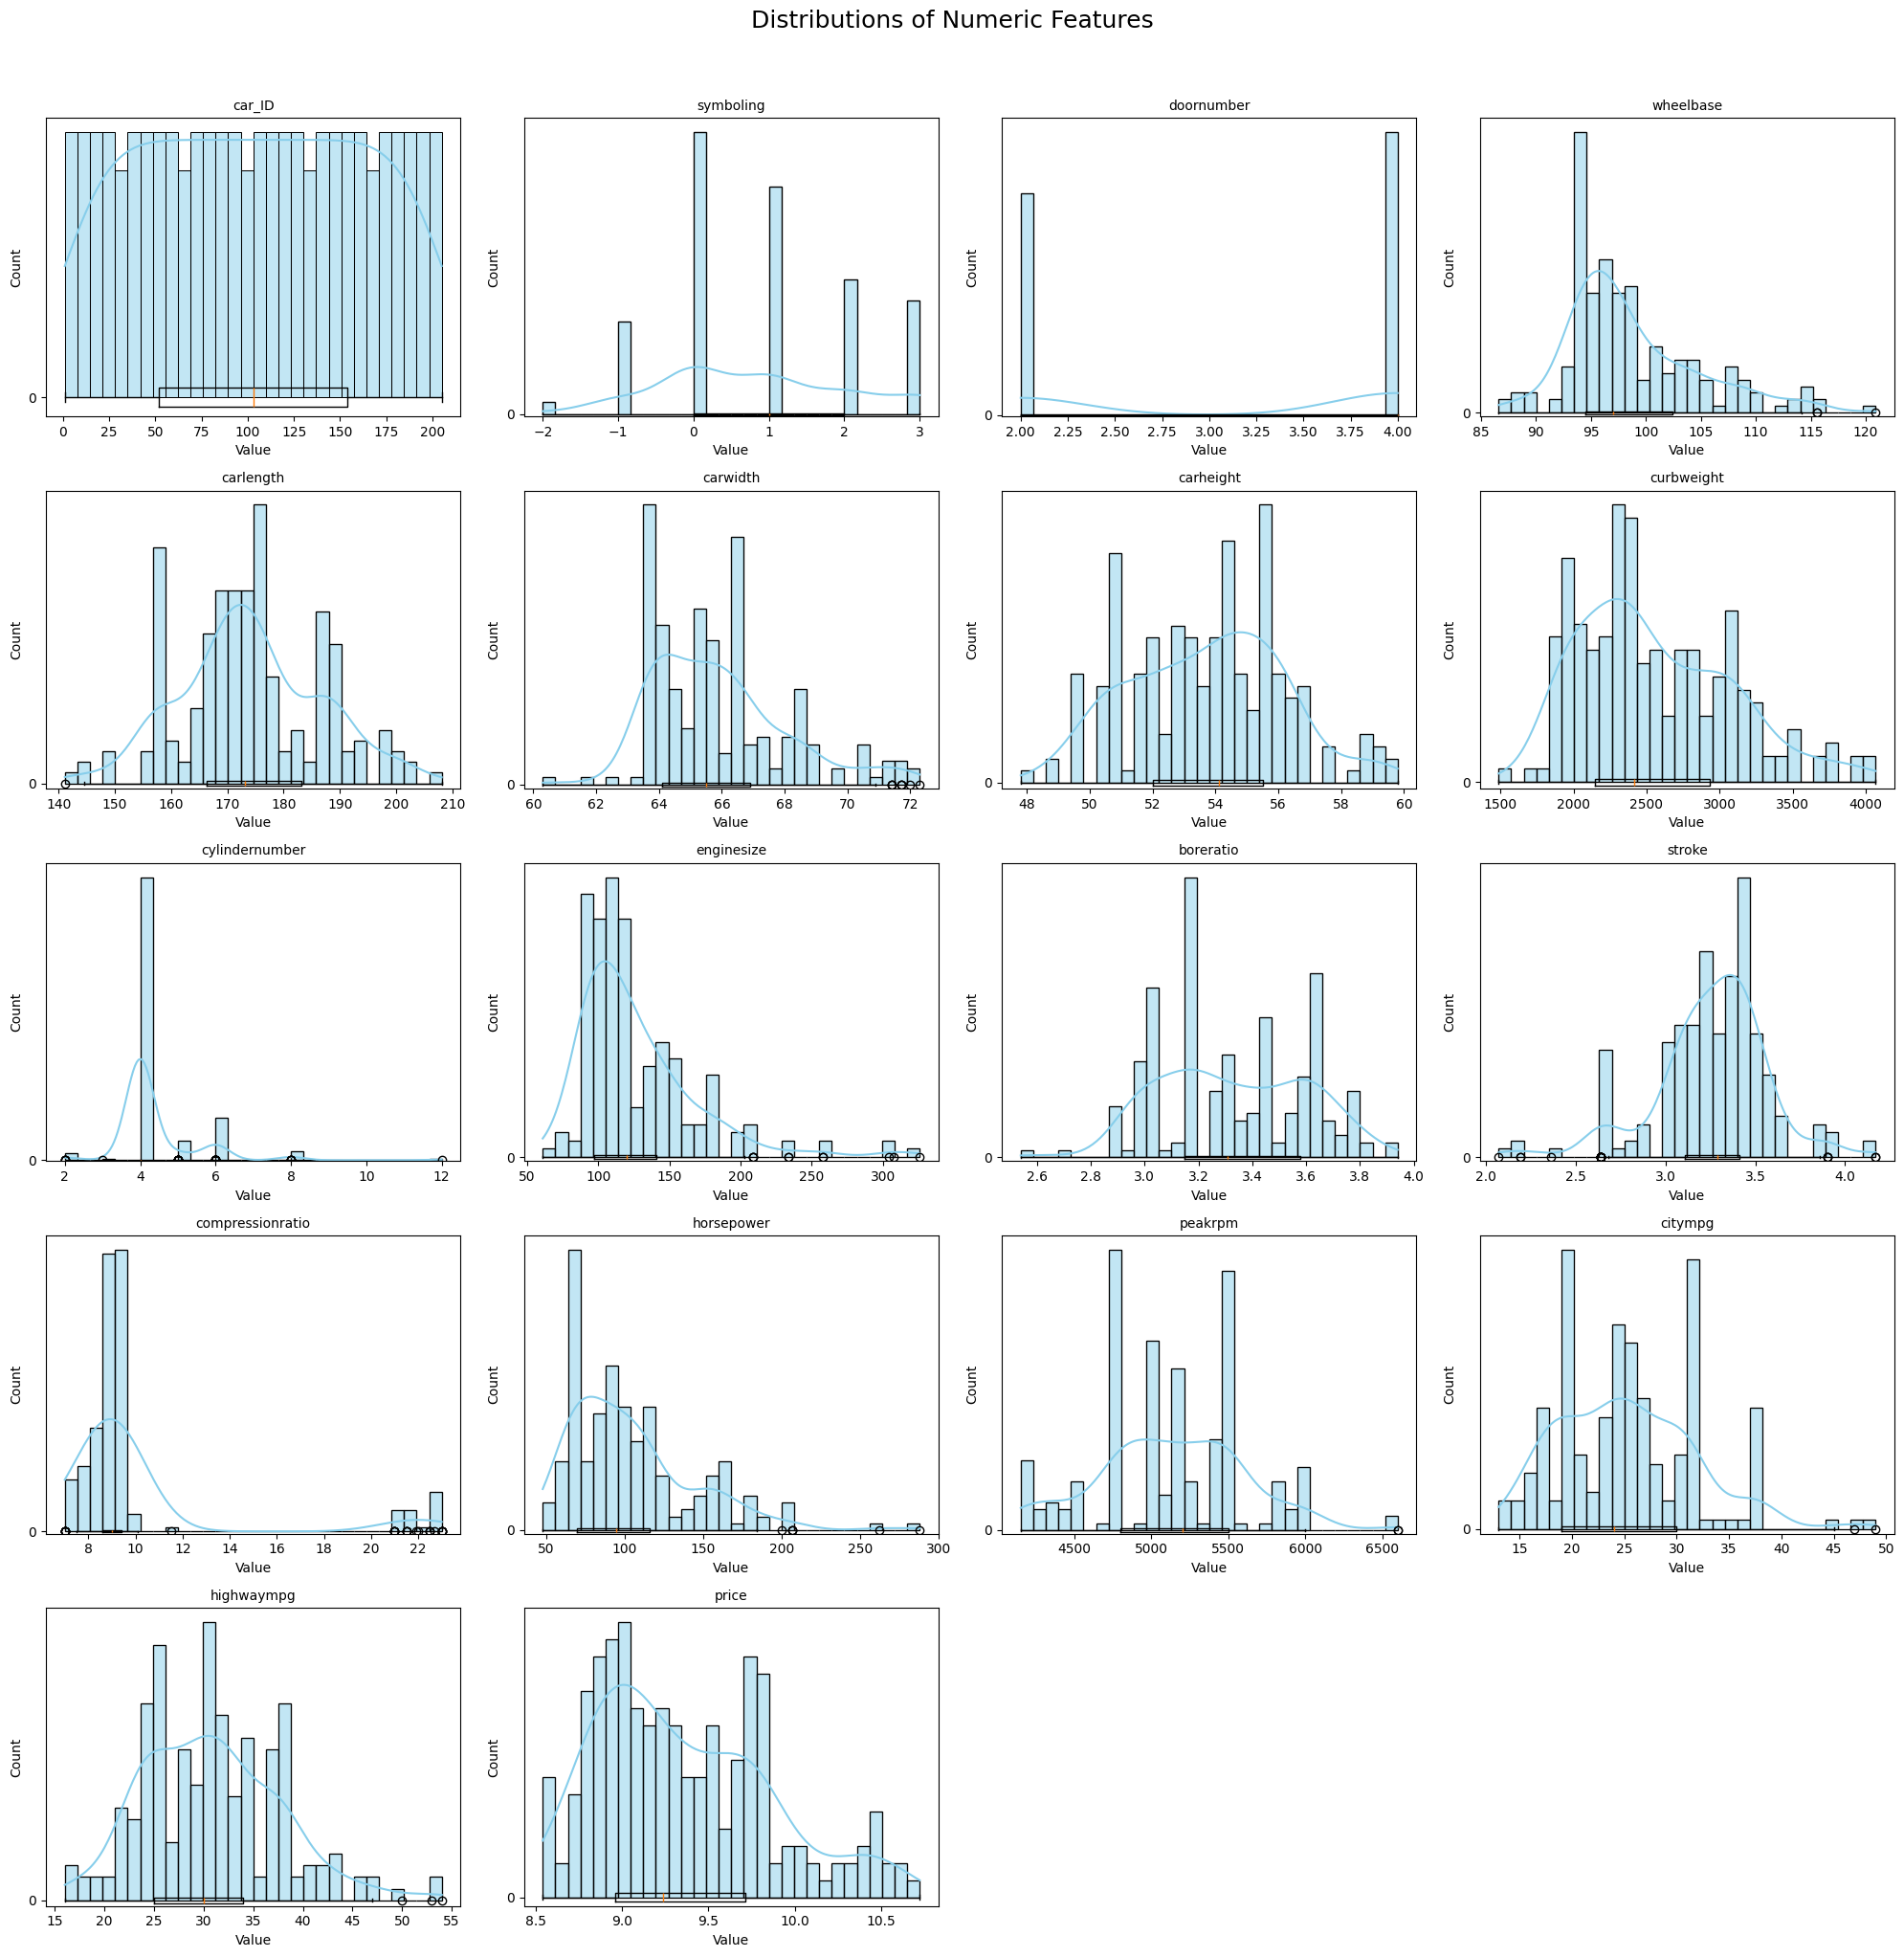

In [30]:
# Distributions
# List of all numeric measurement columns to visualize
columns_to_plot = ['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price']

# Set up figure
n_cols = 4
n_rows = -(-len(columns_to_plot) // n_cols)  # ceiling division

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Histogram with KDE
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    
    # Boxplot overlay (horizontal, using additional y-tick to avoid overlap)
    try:
        plt.boxplot(df[col].dropna(), vert=False, positions=[0], widths=0.5)
    except Exception as e:
        print(f"Boxplot failed for {col}: {e}")
    
    plt.title(col, fontsize=10)
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.tight_layout()

plt.suptitle('Distributions of Numeric Features', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


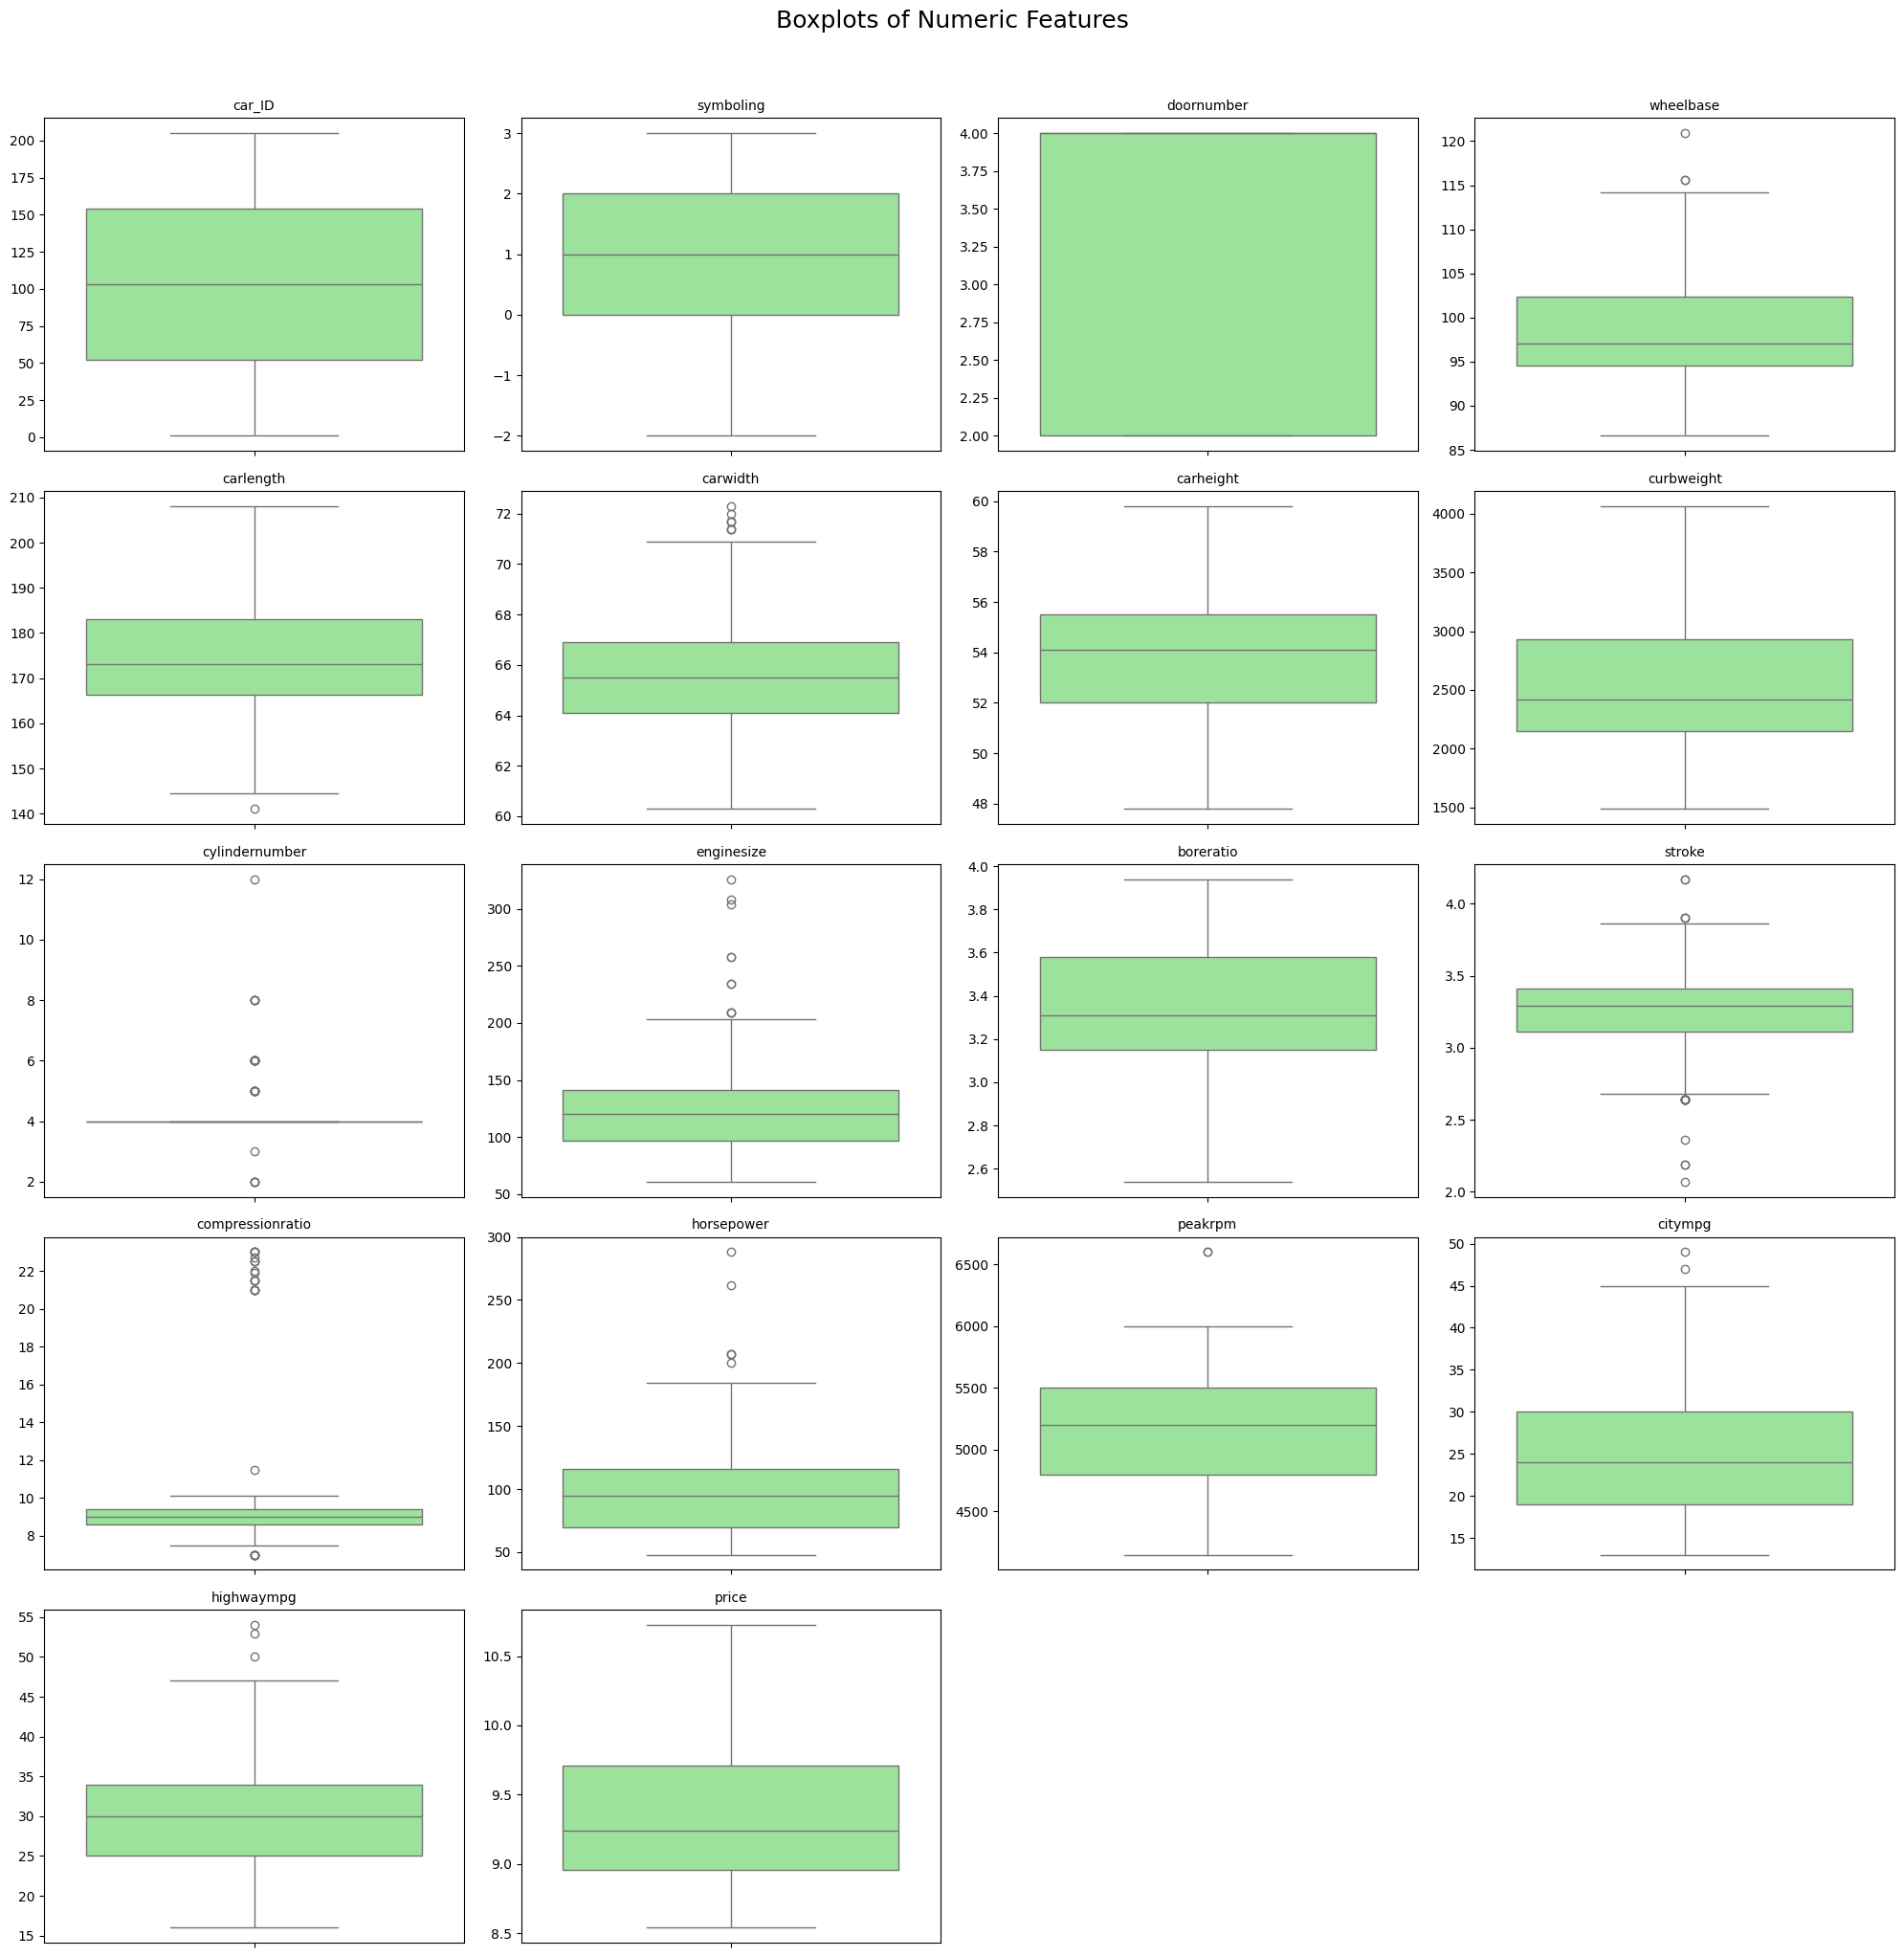

In [31]:
# List of numeric columns
columns_to_plot = ['car_ID', 'symboling', 'doornumber', 'wheelbase', 'carlength',
                   'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize',
                   'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
                   'citympg', 'highwaympg', 'price']

# Layout configuration
n_cols = 4
n_rows = -(-len(columns_to_plot) // n_cols)  # ceiling division

plt.figure(figsize=(n_cols*5, n_rows*4))

# Plot each column
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(col, fontsize=10)
    plt.ylabel('')
    plt.xlabel('')

plt.suptitle('Boxplots of Numeric Features', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


In [32]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,9.510075,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,9.711116,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,9.711116,alfa-romero
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,9.543235,audi
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,9.767095,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,23,28,9.731809,volvo
201,202,-1,volvo 144ea,gas,turbo,4,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19,25,9.854560,volvo
202,203,-1,volvo 244dl,gas,std,4,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,18,23,9.975110,volvo
203,204,-1,volvo 246,diesel,turbo,4,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,26,27,10.019936,volvo


# INSIGHTS:
Several features like wheelbase, carwidth, cylindernumber, enginesize, and compressionratio have positively skewed distributions, suggesting the presence of outliers on the higher end of the value range.

stroke and horsepower also show similar characteristics of heavy tails.

Features like doornumber, carheight, peakrpm, citympg, and highwaympg have relatively symmetric distributions with mild tails.

car_ID has a symmetric distribution, while price shows a distribution with lighter tails and fewer extreme values.

# FEATURE ENGINEERING

Dropping the columns that shows relatively weak correlations with the price having correlation coefficients closer to zero, indicating that they have less impact on the car's price.

In [33]:
# List of columns to drop
columns_to_drop = ["car_ID", "symboling", "doornumber", "stroke", "compressionratio"]

# Drop the specified columns from the DataFrame
df.drop(columns_to_drop, axis=1, inplace=True)

# PCA
We found there is a high correlation between the independent variables. To reduce avoid multicolinearity we are about to perform PCA on these columns
carlength and curbweight : 0.877728

carlength and carwidth : 0.841118

carwidth and curbweight : 0.867032

enginesize and curbweight: 0.850594

enginesize and carwidth : 0.735433

horsepower and enginesize: 0.809769

horsepower and curbweight: 0.750739

citympg and highwaympg : 0.971337

In [34]:
df.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,alfa-romero giulia,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,...,4,130,mpfi,3.47,111,5000,21,27,9.510075,alfa-romero
1,alfa-romero stelvio,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,...,4,130,mpfi,3.47,111,5000,21,27,9.711116,alfa-romero
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,6,152,mpfi,2.68,154,5000,19,26,9.711116,alfa-romero
3,audi 100 ls,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,...,4,109,mpfi,3.19,102,5500,24,30,9.543235,audi
4,audi 100ls,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,...,5,136,mpfi,3.19,115,5500,18,22,9.767095,audi


In [49]:
# Prepare data
columns_for_pca = ['carlength', 'carwidth', 'curbweight', 'enginesize', 
                   'horsepower', 'citympg', 'highwaympg']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[columns_for_pca])

# Fit PCA and transform with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(scaled_data)

# Check cumulative variance
print(f"Variance explained by 3 PCs: {pca.explained_variance_ratio_.sum():.2%}")

# Create final dataframe
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'], index=df.index)
final_df = pd.concat([df, pca_df], axis=1)

Variance explained by 3 PCs: 94.77%


# ENCODING CATEGORICAL COLUMNS

In [36]:
encoding_df=final_df.copy()

In [37]:
encoding_df.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,boreratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName,PC1,PC2,PC3
0,alfa-romero giulia,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,111,5000,21,27,9.510075,alfa-romero,0.070353,-1.152224,-0.128648
1,alfa-romero stelvio,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,...,3.47,111,5000,21,27,9.711116,alfa-romero,0.070353,-1.152224,-0.128648
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,2.68,154,5000,19,26,9.711116,alfa-romero,1.366912,-1.228706,0.478876
3,audi 100 ls,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.19,102,5500,24,30,9.543235,audi,-0.111224,-0.081508,-0.495482
4,audi 100ls,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.19,115,5500,18,22,9.767095,audi,1.462274,-0.760035,-0.665499


In [38]:
encoding= pd.get_dummies(data=encoding_df, columns=['CarName', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem','CompanyName','enginetype'],drop_first=True)

In [39]:
encoding.head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,peakrpm,...,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,5000,...,False,False,False,False,False,False,False,False,False,False
1,88.6,168.8,64.1,48.8,2548,4,130,3.47,111,5000,...,False,False,False,False,False,False,False,False,False,False
2,94.5,171.2,65.5,52.4,2823,6,152,2.68,154,5000,...,False,False,False,False,False,False,False,False,True,False
3,99.8,176.6,66.2,54.3,2337,4,109,3.19,102,5500,...,False,False,False,False,False,False,True,False,False,False
4,99.4,176.6,66.4,54.3,2824,5,136,3.19,115,5500,...,False,False,False,False,False,False,True,False,False,False


In [40]:
encoding = encoding.astype(int)

In [41]:
encoding.head()

,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,horsepower,peakrpm,...,CompanyName_subaru,CompanyName_toyota,CompanyName_volkswagen,CompanyName_volvo,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,88,168,64,48,2548,4,130,3,111,5000,...,0,0,0,0,0,0,0,0,0,0
1,88,168,64,48,2548,4,130,3,111,5000,...,0,0,0,0,0,0,0,0,0,0
2,94,171,65,52,2823,6,152,2,154,5000,...,0,0,0,0,0,0,0,0,1,0
3,99,176,66,54,2337,4,109,3,102,5500,...,0,0,0,0,0,0,1,0,0,0
4,99,176,66,54,2824,5,136,3,115,5500,...,0,0,0,0,0,0,1,0,0,0


# SPLITTING DATA INTO TRAIN AND TEST

In [42]:
# Separate the target variable 'price' from the input features 'X'
y = encoding['price']
X = encoding.drop('price', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(164, 204)
(41, 204)
(164,)
(41,)


# MODEL BUILDING

In [44]:
# Define models
lr  = LinearRegression()
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
dtr = DecisionTreeRegressor(random_state=42)
abr = AdaBoostRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)

In [45]:
regression_models = {
    "Linear Regression": lr,
    "Random Forest": rfr,
    "Gradient Boosting": gbr,
    "Decision Tree": dtr,
    "AdaBoost": abr
}

# Store results
results = []

In [46]:
for name, model in regression_models.items():
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)
    
    # Metrics
    metrics = {
        "Model": name,
        "Train MSE": mean_squared_error(y_train, y_train_pred),
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Train R²": r2_score(y_train, y_train_pred),
        "Test R²": r2_score(y_test, y_test_pred)
    }
    
    results.append(metrics)

In [47]:
# Create a DataFrame for comparison
results_df = pd.DataFrame(results)

# Optional: sort by best Test R²
results_df = results_df.sort_values(by="Test R²", ascending=False)
results_df

,Model,Train MSE,Test MSE,Train RMSE,Test RMSE,Train MAE,Test MAE,Train R²,Test R²
1,Random Forest,0.014020,0.044083,0.118404,0.209959,0.058659,0.085854,0.963302,0.867198
2,Gradient Boosting,0.004745,0.051424,0.068883,0.226769,0.044720,0.110097,0.987580,0.845082
3,Decision Tree,0.000000,0.073171,0.000000,0.270501,0.000000,0.073171,1.000000,0.779570
4,AdaBoost,0.058080,0.090366,0.240999,0.300609,0.182715,0.200094,0.847968,0.727769
0,Linear Regression,0.007464,1.261733,0.086395,1.123269,0.046437,0.755336,0.980462,-2.801027


In [48]:
# Store test results
test_results = []

for name, model in regression_models.items():
    model.fit(X_train, y_train)
    
    # Predictions on test set
    y_test_pred  = model.predict(X_test)
    
    # Metrics (only test)
    metrics = {
        "Model": name,
        "Test MSE": mean_squared_error(y_test, y_test_pred),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Test R²": r2_score(y_test, y_test_pred)
    }
    
    test_results.append(metrics)

# Create DataFrame for test evaluation
test_results_df = pd.DataFrame(test_results)

# Optional: sort by best R²
test_results_df = test_results_df.sort_values(by="Test R²", ascending=False)
test_results_df


,Model,Test MSE,Test RMSE,Test MAE,Test R²
1,Random Forest,0.044083,0.209959,0.085854,0.867198
2,Gradient Boosting,0.051424,0.226769,0.110097,0.845082
3,Decision Tree,0.073171,0.270501,0.073171,0.779570
4,AdaBoost,0.090366,0.300609,0.200094,0.727769
0,Linear Regression,1.261733,1.123269,0.755336,-2.801027


# Conlusion 
# Random Forest Regressor is the best model with MSE = 0.044 , MAE = 0.085 , RMSE = 0.209 et R^2 = 0.867